In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
"""encoder = OneHotEncoder(sparse_output=False)
ChestPainType1 = encoder.fit_transform(df[['ChestPainType']])
RestingECG=encoder.fit_transform(df[['RestingECG']])
ST_Slope=encoder.fit_transform(df[['ST_Slope']])
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})"""

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


categorical_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})


In [ ]:
print(df)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0             0     

In [ ]:
y=df["HeartDisease"].values
X = df[[
    "Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina", "Oldpeak",
    "ChestPainType_ASY", "ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA",
    "RestingECG_LVH", "RestingECG_Normal", "RestingECG_ST",
    "ST_Slope_Down", "ST_Slope_Flat", "ST_Slope_Up"
]].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#80% for trainning
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5231 - loss: 0.6958 - val_accuracy: 0.6739 - val_loss: 0.6023
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 0.5789 - val_accuracy: 0.8152 - val_loss: 0.5074
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8377 - loss: 0.4872 - val_accuracy: 0.8478 - val_loss: 0.4314
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8546 - loss: 0.4230 - val_accuracy: 0.8696 - val_loss: 0.3834
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 0.3662 - val_accuracy: 0.8587 - val_loss: 0.3602
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8657 - loss: 0.3323 - val_accuracy: 0.8533 - val_loss: 0.3564
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8708 - loss: 0.3311 - val_accuracy: 0.8587 - val_loss: 0.3446
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8735 - loss: 0.3122 - val_accuracy: 0.8587 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8504 - loss: 0.3143
Test Loss: 0.3050
Test Accuracy: 0.8641


In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow. keras.utils import plot_model

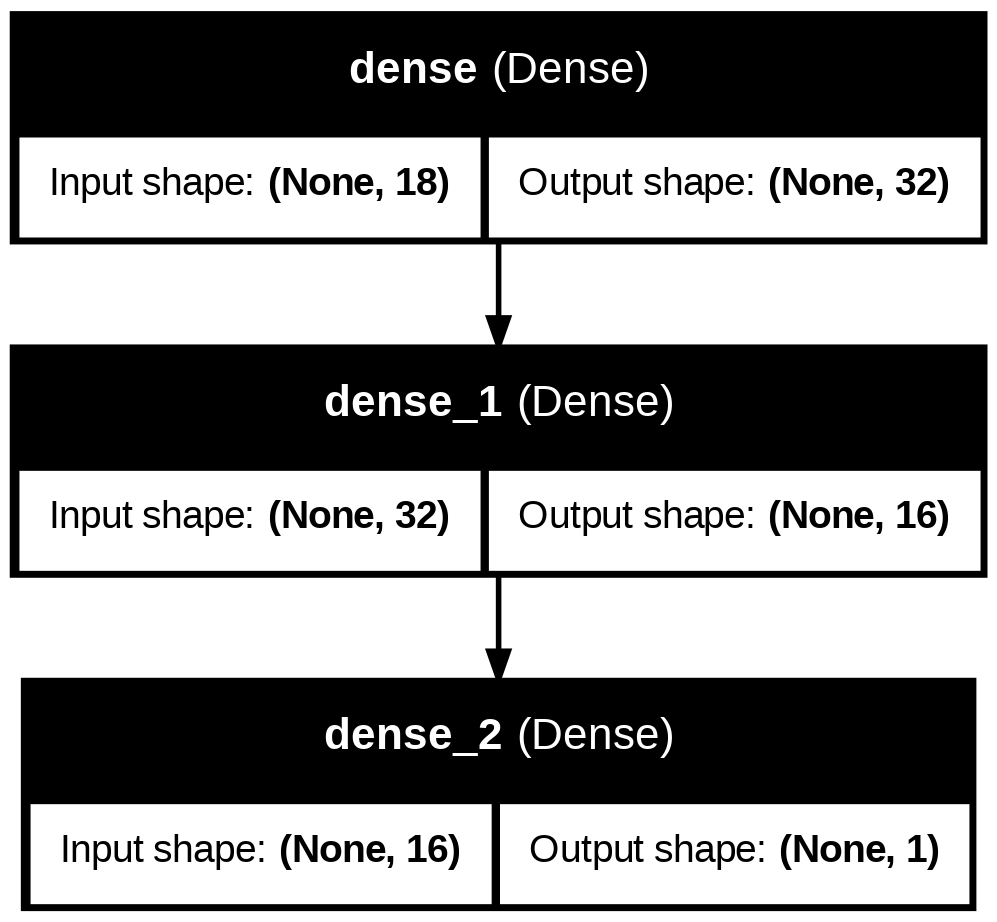

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

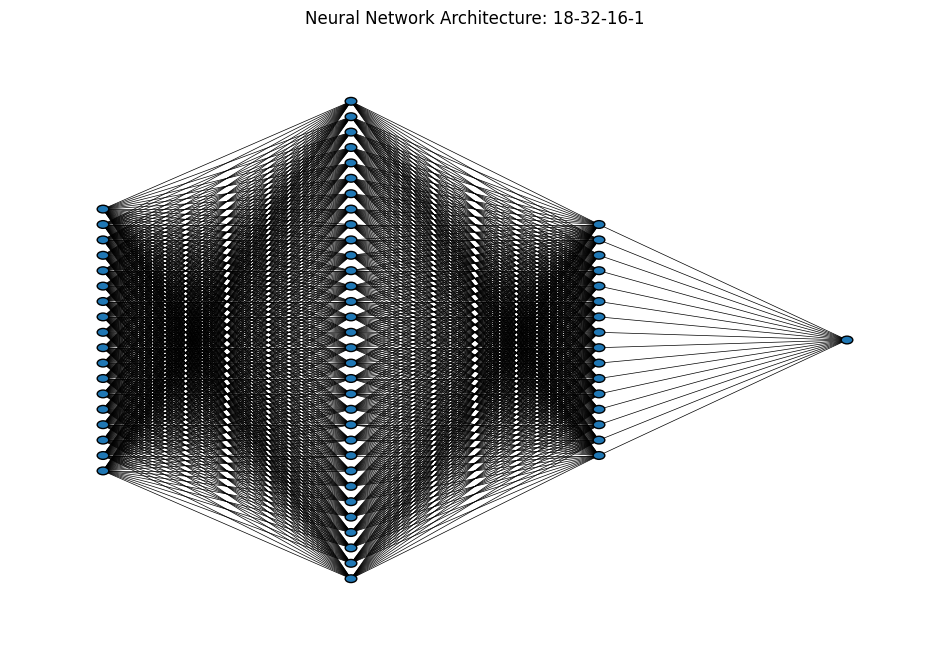

In [ ]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(n_layers - 1)

    # Nodes
    for i, n_count in enumerate(layer_sizes):
        layer_top = v_spacing*(n_count - 1)/2. + (top + bottom)/2.
        for j in range(n_count):
            circle = plt.Circle((left + i*h_spacing, layer_top - j*v_spacing), v_spacing/4,
                                color='C0', ec='k', zorder=4)
            ax.add_artist(circle)

    # Connections
    for i, (n_count_a, n_count_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(n_count_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(n_count_b - 1)/2. + (top + bottom)/2.
        for j in range(n_count_a):
            for k in range(n_count_b):
                line = plt.Line2D([left + i*h_spacing, left + (i+1)*h_spacing],
                                  [layer_top_a - j*v_spacing, layer_top_b - k*v_spacing],
                                  c='k', lw=0.5)
                ax.add_artist(line)

# Define your architecture
layer_sizes = [18, 32, 16, 1]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture: 18-32-16-1')
plt.show()

In [ ]:
# Example of one sample (make sure to match the feature order and count)
new_input = [[75, 1, 180, 280, 0, 150, 0, 1.2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]]  # 18 values

# Scale (if not already scaled)
new_input_scaled = scaler.transform(new_input)

# Predict
pred = model.predict(new_input_scaled)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.9064055]]
